# Datatieteen projekti: Oppimispäiväkirja

## Sisällysluettelo

1. [Johdanto datatieteeseen](#johdanto-datatieteeseen)
2. [Kehitysympäristön perustaminen](#kehitysympäristön-perustaminen)
3. [Jäitten lähdön ajankohdan ennustaminen](#jäitten-lähdön-ajankohdan-ennustaminen)
4. [Opinnäytetöiden verrannollisuudet](#opinnäytetöiden-verrannollisuudet)
5. [Ministeriöiden twiittien ryvästäminen](#ministeriöiden-twiittien-ryvästäminen)
6. [Hardcore Zen blogitekstien aiheenmallinnus](#hardcore-zen-blogitekstien-aiheenmallinnus)
7. [Sanapilven luominen LessWrong-kirjoituksista](#sanapilven-luominen-lesswrong-kirjoituksista)
8. [Datatiedeprojektin vaiheet](#datatiedeprojektin-vaiheet)

# 1. Johdanto datatieteeseen <a name="johdanto-datatieteeseen"></a>

### 1.1 Millainen on datatieteilijä?

![Moderni datatieteilijä](modern-data-scientist.jpg)

### 1.2 Vinoumat ja elämänkatsomus vaikuttavat datatieteilijän työn tuloksiin. 

**Välttääkseen vinoumia, niistä täytyy olla tietoinen**

![Vinoumat](biases.jpg)

### 1.3 Datatieteen metrokartta havainnollistaa hyvin, miten laajan osaamisen datatiede kattaa.

![Reitti datatieteilijäksi](RoadToDataScientist.png)
http://nirvacana.com/thoughts/2013/07/08/becoming-a-data-scientist/

Lisäksi kannattaa muistaa **datan keräyksestä**, että ihmisiin vaikuttaa tieto siitä, että heidän toimintaansa seurataan tai tekemistään mitataan.

### 1.4 Datatieteen työvälineistä ja avoimia datalähteitä

Käymme läpi työkirjassa muutaman tärkeimmän Python-kirjaston esimerkkien avulla ja alussa tutustutaan Jupyter Notebookiin.

Aineiston laatu on olennaista: Roskasta on vaikeaa hioa jalokiviä. (garbage in, garbage out -periaate) Kuten metallienkin louhinnassa, täytyy löytää malmia, jossa on arvokasta ainesta riittävästi suhteessa roskaan, jotta sen kerääminen ja jalostaminen kannattaa. Datamalmia löytää monista avoimen datan (open data) lähteistä. Tässä muutama esimerkki:

https://www.avoindata.fi/

https://stat.fi/org/avoindata/index.html

https://www.ilmatieteenlaitos.fi/avoin-data

https://openweathermap.org/

https://data.europa.eu/en/dataeuropa-academy/what-open-data

https://data.worldbank.org/?location

https://data.unicef.org/open-data/

https://www.gapminder.org/data/

# 2. Kehitysympäristön perustaminen <a name="kehitysympäristön-perustaminen"></a>

### 2.1 Mitkä ovat  datatiedeprojektin keskeiset Python-kirjastot?

- scikit-learn
- pandas
- numpy
- tensorflow
- pytorch
- seaborn
- matplotlib

Lisäksi käytetään esim. raapijoita varten kirjastoja kuten requests, joiden avulla voidaan viestitellä nettisivupalvelimien kanssa.

### 2.2 Mitä ympäristövaihtoehtoja on olemassa, mitkä ovat niiden vahvuudet ja heikkoudet ja miten teet valinnan ympäristöjen välillä?

- Omalle koneelle asentamalla oppii samalla ylläpitotehtäviä ja hallitsee järjestelmää.
- Työkirjoja voisi hallinnoida myös VS Codiumilla.
- Pilvipalveluiden heikkouksia ovat mm. täysi riippuvuus internet-yhteydestä eli data ja laskentateho ovat muurin takana.
- Yksi vaihtoehto pilvityökirjaksi on [CSC - IT CENTER FOR SCIENCE](https://notebooks.rahtiapp.fi/welcome)

### 2.3 Miten kirjastot kannattaa asentaa?

1. Asentamalla ensin Anaconda virtuaaliympäristöjen hallinnointia varten.
2. Tarkoituksenmukaisen virtuaaliympäristön luominen, esim.: conda create -n datatiede python=3.11 scikit-learn pandas numpy
3. Virtuaaliympäristön aktivoiminen: conda activate datatiede
4. Tarvittavien pakettien asentaminen, esim. conda install pytorch matplotlib seaborn
5. Jupyter notebookin asentaminen, esim. conda install -c conda-forge notebook
6. Nyt Jupyter notebookia voi käyttää virtuaaliympäristössä komennolla: jupyter notebook

### 2.4 Miten järjestelmästä tiedot saa esille?

In [1]:
import json
import sys

print(sys.version) 
platformi = sys.platform
pythoni = sys.version

environment = {
    "os_environment": platformi,  # "Linux Mint 21.3",
    "python_version": pythoni,  # "3.11.8",
}

# Tallennetaan tiedot tiedostoon
with open('data.json', 'w') as f:
    json.dump(environment, f, indent=1)

print(environment)

3.11.5 (main, Sep 11 2023, 13:23:44) [GCC 11.2.0]
{'os_environment': 'linux', 'python_version': '3.11.5 (main, Sep 11 2023, 13:23:44) [GCC 11.2.0]'}


# 3 Jäitten lähdön ajankohdan ennustaminen <a name="jäitten-lähdön-ajankohdan-ennustaminen"></a>

### 3.1 Johdanto ja data

Käymme läpi yksinkertaisen esimerkin jäitten lähdön ajankohdan ennustamisesta käyttäen suoraviivaista taantumamallia (lineaarista regressiomallia). Käytettävä tieto on kerätty vuosien saatossa, ja sitä esikäsitellään ennen mallin sovittamista dataan ja ennusteiden tekemistä.

Tallentamalla seuraavan tekstin tiedostoon icetimes.csv saa muistikirjan toimimaan:

### 3.2 Tarvittavien kirjastojen käyttöönotto eli tuonti, sekä datan avaaminen tiedostosta

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # for later updates
from sklearn.linear_model import LinearRegression
from scipy import stats

# Read data from a CSV file
data = pd.read_csv('icetimes.csv')

# Extract information from the data
X = data['Year'].values.reshape(-1, 1)  # Year should be the feature
y = data['Day_in_April'].values  # Day in April is the target variable

### 3.3 Yksinkertaisen lineaarisen regressiomallin käyttö suoran sovittamiseen ja luottamusvälit

In [3]:
# Fit linear regression model
model = LinearRegression().fit(X, y)

# Create redictions
predictions = model.predict(X)

# Confidence intervals
confidence_095 = 0.95
squared_errors = np.sum((model.predict(X) - y) ** 2)
standard_error = np.sqrt(squared_errors / (len(X) - 2))
t_score_095 = stats.t.ppf(1 - (1 - confidence_095) / 2, len(X) - 2)
margin_of_error_095 = t_score_095 * standard_error

# Upper and lower bounds for 95% confidence interval
upper_095 = predictions + margin_of_error_095
lower_095 = predictions - margin_of_error_095

# Confidence intervals for 0.69
confidence_069 = 0.69
t_score_069 = stats.t.ppf(1 - (1 - confidence_069) / 2, len(X) - 2)
margin_of_error_069 = t_score_069 * standard_error

# Upper and lower bounds for 0.69 confidence interval
upper_069 = predictions + margin_of_error_069
lower_069 = predictions - margin_of_error_069

### 3.4 Informaation kuvaaminen havainnollistavasti

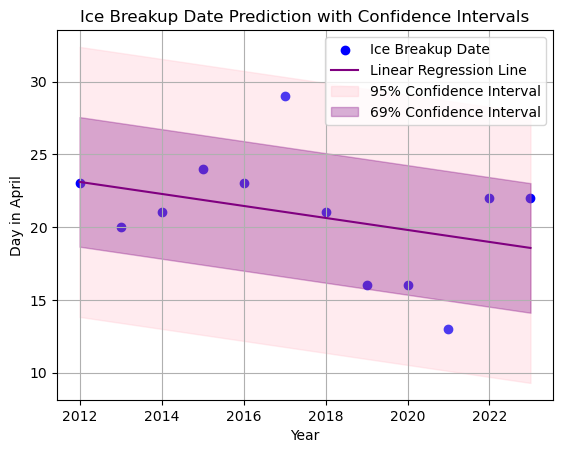

In [4]:
# Visualization
plt.scatter(data['Year'], data['Day_in_April'], color='blue', label='Ice Breakup Date')
plt.plot(data['Year'], predictions, color='purple', label='Linear Regression Line')
plt.fill_between(data['Year'], lower_095, upper_095, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(data['Year'], lower_069, upper_069, color='purple', alpha=0.3, label='69% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Day in April')
plt.title('Ice Breakup Date Prediction with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

### 3.5 Ennusteiden laskeminen seuraaville vuosille

In [5]:
# Create predictions for three more years
future_years = np.array([[2024], [2025], [2026]]).reshape(-1, 1)
future_predictions = model.predict(future_years).round(0)
print(f"Future predictions for 2024, 2025, and 2026: {future_predictions}")

Future predictions for 2024, 2025, and 2026: [18. 18. 17.]


### 3.6 Kehitysideoita

  - Karkauspäivät
  - Vuoden x. päivä huhtikuun sijasta
  - Kellonajan huomioiminen
  - Ehkä date import, mieluummin ei riippuvuuksia
  - Automatisointi datan jalostamiseen
  - Tiedostotyypeistä lukeminen: taulukkolaskenta, txt
  - Kauniimpi kuvaaja, esim Seaborn
  - Todennäköisyysjakauma suoran sovituksen ympärille, esim 1 ja 2 keskihajontaa

### 3.7 Yhteenveto

Esiteltiin yksinkertainen esimerkki jäitten lähdön ajankohdan ennustamisesta käyttäen lineaarista regressiomallia. 
Aineisto kerättiin paperilla ja kynällä vuosien saatossa kerätystä materiaalista. Alkuperäisessä aineistossa oli kaksi puuttuvaa vuotta x ja y. Puolet merkinnöistä sisälsi kellonajan, ja pari mainintaa jäiden sulamisesta paikalleen tavallisen irtoamisen sijaan. Ne esikäsiteltiin lisäämällä puuttuvien vuosien kohdalle aineiston keskiarvotulos, ja poistamalla kellonajat. Jäidenlähtömenetelmää ei huomioitu, sillä pyritään ennakoimaan ajankohtaa, ei tyyppiä (jonka selvittäminen vaatisi tutkimustyötä).

Sitten sovitettiin malli dataan ja luotiin ennusteet. Lopuksi tulokset näytetään kuvaajana.

# 4 Opinnäytetöiden verrannollisuudet<a name="opinnäytetöiden-verrannollisuudet"></a>

### 4.1 Johdanto ja datan lähde

Tieto- ja viestintätekniikan opinnäytteiden metadata on peräisin Turun ammattikorkeakoulusta vuosilta 2017-2022

Data saatavissa osoitteesta: 
https://www.avoindata.fi/data/fi/dataset/opinnaytetyot-tieto-ja-viestintatekniikka-metadata

Suora latauslinkki käytettyyn dataan: 
https://www.avoindata.fi/data/dataset/5c535703-b891-4576-9bf1-807402b41fff/resource/8d597b84-5b33-495f-a5be-d94a87bb4427/download/output_fi.csv

### 4.2 Kirjastot ja datan lataus

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from collections import defaultdict

# Load the CSV file into a DataFrame
file_path = 'output_fi.csv'
data = pd.read_csv(file_path)

### 4.3 Tarkastellaan dataa

In [7]:
# Display the first few rows of the data to understand its structure
print(data.head(10))

   Total References  Internet References  Printed References  Weak References  \
0               2.0                  NaN                 NaN              NaN   
1               9.0                  1.0                 8.0              NaN   
2               4.0                  4.0                 NaN              NaN   
3              48.0                 47.0                11.0              5.0   
4               5.0                  4.0                 1.0              NaN   
5              86.0                 47.0                 2.0              6.0   
6              69.0                 29.0                 7.0              1.0   
7              19.0                  8.0                 NaN              NaN   
8               NaN                  NaN                 NaN              NaN   
9              35.0                 12.0                 NaN              NaN   

   Pages  Total Word Count  Study Credits  Study Entitlement Days  Grade  \
0     31            4787.0      

### 4.4 Katsotaan löytyykö datasta aukkoja eli tyhjiä kohtia

In [8]:
# Count null values in the DataFrame
null_counts = data.isnull().sum()

# Print the count of null values for each column
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Total References           42
Internet References        43
Printed References         96
Weak References           122
Pages                       0
Total Word Count            3
Study Credits               0
Study Entitlement Days      0
Grade                       0
Supervisor ID               0
Keywords                    0
Total Occurrences           0
dtype: int64


### 4.5 Jatkokehitysideoita

In [9]:
# TODO: voisi esim. ottaa toisenkin lähteen opinnäytteiden tiedoista ja yhdistää ne
# Yhdistetään kaksi datakehystä
# both_datasets = pd.merge(data, another_data, on='Grade', how='left')  # or outer? | how exactly?

# Uudelleenimeäminen
# another_data.rename(columns={'vääränniminen': 'oikeanlaiseksi'}, inplace=True)

# Järjestäminen
# both_datasets.sort_values(by='Total Word Count', ascending=False, inplace=True)

### 4.6 Valitaan kiinnostavimmat sarakkeet eli muuttujat ja poistetaan vajavaiset rivit

In [10]:
# Drop rows with null values in the desired variables
variables_of_interest = ['Total Word Count', 'Total References', 'Printed References', 'Study Entitlement Days']
data.dropna(subset=variables_of_interest, inplace=True)

### 4.7 Lasketaan keskiarvot ja tulostetaan tiedot arvosanoittain

In [11]:
# Calculate averages for 'Total Word Count' and 'Total References' for each grade
summary = data.groupby('Grade')[variables_of_interest].mean().round(1)
print(summary)

       Total Word Count  Total References  Printed References  \
Grade                                                           
1                5241.0               5.0                 1.0   
2                5566.1              24.3                 3.1   
3                5869.3              24.1                 4.2   
4                7721.2              28.5                 9.5   
5               10172.2              44.1                18.7   

       Study Entitlement Days  
Grade                          
1                      1867.3  
2                      1561.9  
3                      1573.8  
4                      1622.3  
5                      1509.3  


### 4.8 Laskelmia verrannollisuus-matriisia varten

In [12]:
# Calculate averages for 'Total Word Count' and 'Total References' for each grade
summary = data.groupby('Grade')[variables_of_interest].mean()

# Reset the index to make 'Grade' a regular column
summary.reset_index(inplace=True)

# Calculate correlation matrix between 'Grade' and other numeric variables
correlation_matrix = summary.corr().round(3)

# Print correlation coefficients with 'Grade' (assuming 'Grade' is numeric)
print("Correlation between Grade and other variables:")
print(correlation_matrix['Grade'])

# Save the correlation matrix to files
correlation_matrix.to_excel('gradecorrelations.xlsx', index=False)
correlation_matrix.to_pickle('gradecorrelations.pkl')

Correlation between Grade and other variables:
Grade                     1.000
Total Word Count          0.922
Total References          0.934
Printed References        0.931
Study Entitlement Days   -0.739
Name: Grade, dtype: float64


### 4.9 Havainnollistetaan korrelaatioiden voimakkuutta matriisilla

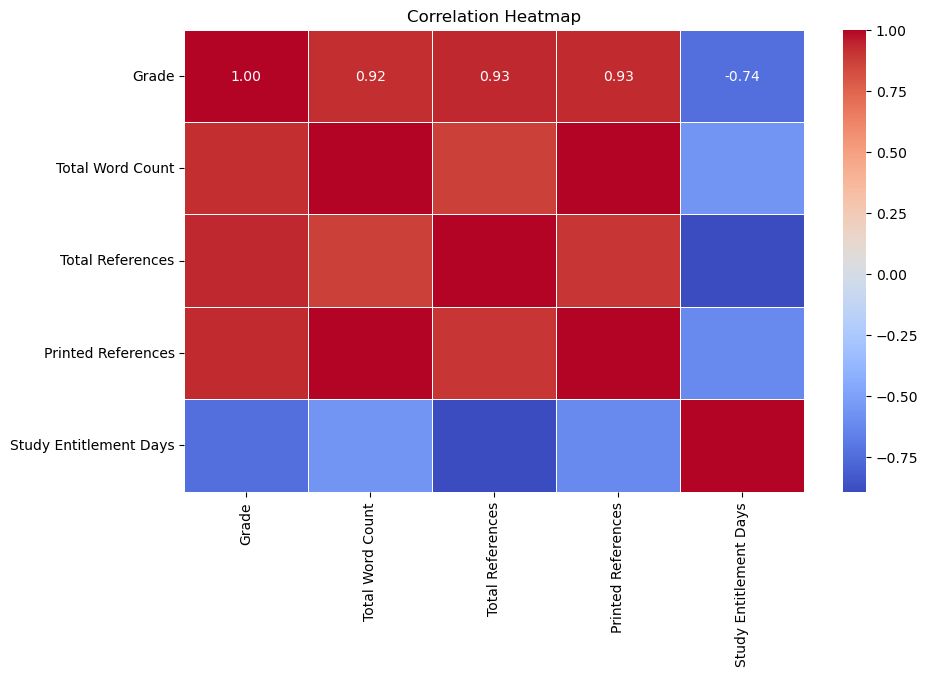

In [13]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 4.10 Havainnollistetaan viittausten määrän suhdetta kokonaissanamäärään

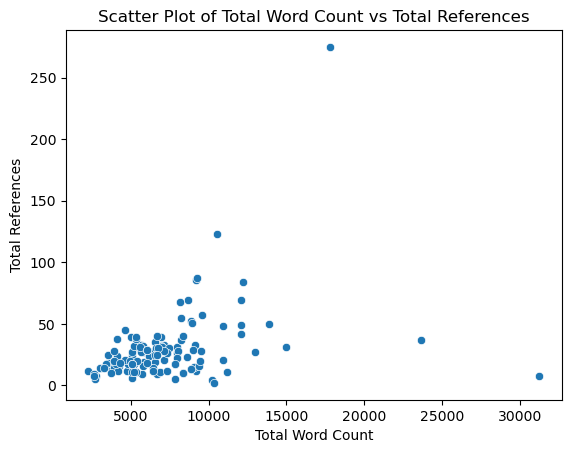

In [14]:
# Create scatter plot
sns.scatterplot(x="Total Word Count", y="Total References", data=data)
plt.xlabel('Total Word Count')
plt.ylabel('Total References')
plt.title('Scatter Plot of Total Word Count vs Total References')
plt.show()

### 4.11 Tutkitaan töiden yleisimpiä asiasanoja

In [15]:
# Function to extract and count keywords from the Keywords column
def extract_and_count_keywords(row):
    keyword_count = defaultdict(int)
    keywords_list = literal_eval(row['Keywords'])  # Convert string representation of list to actual list of dictionaries
    
    for keyword_dict in keywords_list:
        for keyword, _ in keyword_dict.items():
            if isinstance(keyword, str):  # Check if the keyword is a string
                keyword_count[keyword] += 1  # Increment count for this keyword
    
    return keyword_count

# Apply the function to each row to get keyword counts
all_keywords = defaultdict(int)
for index, row in data.iterrows():
    keyword_count = extract_and_count_keywords(row)
    for keyword, count in keyword_count.items():
        all_keywords[keyword] += 1

# Convert the dictionary to a DataFrame for easier sorting and analysis
keywords_df = pd.DataFrame(list(all_keywords.items()), columns=['Keyword', 'Count'])

# Sort the DataFrame by Count in descending order to get the most common keywords
sorted_keywords_df = keywords_df.sort_values(by='Count', ascending=False)

# Display the top 10 most common keywords
top_10_keywords = sorted_keywords_df.head(10)
print(top_10_keywords)

                  Keyword  Count
24             tietoturva     16
19           käytettävyys     11
128  virtuaalitodellisuus      7
8                  python      6
0       ohjelmistokehitys      5
173            javascript      5
130                 unity      4
77        käyttäjäkokemus      4
39         tietotekniikka      4
104                   iot      4


### 4.12 Yhteenveto

Sanamäärä, ja viittaukset (erityisesti kirjallisuuteen) ovat vahvasti ja selkeästi suoraan verrannollisia arvosanaan. Opintoihin käytetty aika näyttää olevan käänteisesti verrannollinen, eli hitaasti opinnoissa edistyneet saavat keskimäärin huonomman arvosanan opinnäytetyöstään kuin nopeasti edistyneet.

Muuttujien välisiä riippuvuuksia voisi tutkia lisää. Esimerkiksi tarkastella dataa, josta on poistettu outlierit tai tutkiskella kvartaaleja erikseen.

# 5 Ministeriöiden twiittien ryvästäminen <a name="ministeriöiden-twiittien-ryvästäminen"></a>

### 5.1 Johdanto

Tässä esimerkissä käsitellään Suomen ministeriöiden twiittaamia lyhyitä viestejä.

### 5.2 Sanojen joukosta poistetaan yleiset, mutta informaatioarvoltaan vähäiset sanat

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess the data
tweets = pd.read_excel('sample_tweets.xlsx')
tweets['text'] = tweets['text_nousernames'].str.lower()

# Define custom stop words
custom_stop_words = ['jos', 'en', 'ja', 'on', 'myös', 'ei', 'että', 
                     'the', 'to', 'in', 'and', 'for', 'rt', 'ole',
                     'tai', 'of', 'and', 'mm', 'co', 'ovat', 'olen',
                     'voi', 'se', 'kun', 'sen', 'https', 'it', 'an',
                     'niin', 'sekä', 'is', 'sitä', 'jossa', 'no',
                     'as', 'joka', 'noin', 'olisi', 'siitä', 'näin']

### 5.3 Menetelmänä käytetään TF-IDF:ää eli term frequency – inverse document frequencyä ja K-means ryvästämistä.

In [17]:
# TF-IDF vectorization with custom stop words
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(tweets['text'])

# Perform K-means clustering
k = 10  # Number of clusters
n_init = 10  # Number of initializations
kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to the dataframe
tweets['cluster_id'] = clusters

# Function to get top n words for each cluster
def get_top_words_per_cluster(tfidf_matrix, clusters, vectorizer, n_words=20):
    terms = vectorizer.get_feature_names_out()
    df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
    df['cluster'] = clusters

    top_words_per_cluster = []
    for cluster_id in range(df['cluster'].nunique()):
        cluster_df = df[df['cluster'] == cluster_id]
        cluster_tfidf_sum = cluster_df.drop('cluster', axis=1).sum()
        top_words = cluster_tfidf_sum.sort_values(ascending=False).head(n_words)
        top_words_per_cluster.append({'Cluster': cluster_id, 'Top Words': top_words.index.tolist()})
    
    return pd.DataFrame(top_words_per_cluster)

# Get top 5 words for each cluster
top_words_df = get_top_words_per_cluster(tfidf_matrix, clusters, vectorizer, n_words=5)

### 5.4 Havainnollistetaan ryppäiden teemoja näyttämällä käytetyimmät sanat

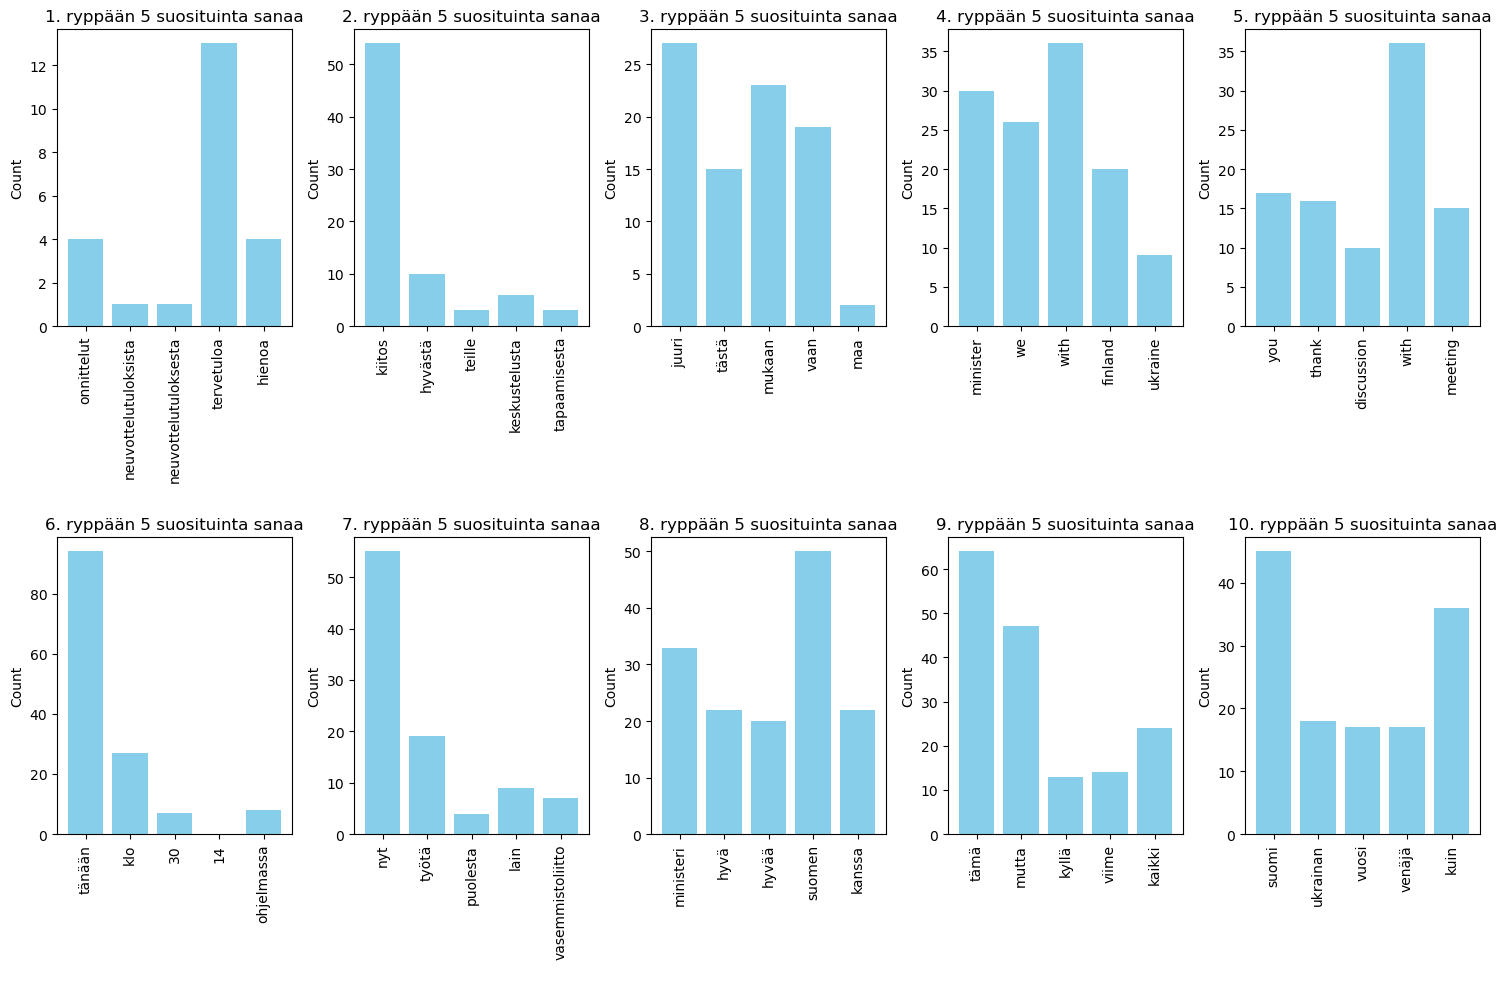

In [18]:
# Plot bar charts for top words in each cluster
plt.figure(figsize=(15, 10))

for index, row in top_words_df.iterrows():
    cluster_id = row['Cluster']
    top_words = row['Top Words']
    word_counts = []
    
    for word in top_words:
        count = np.sum(tweets['text'].apply(lambda x: 1 if word in x.split() else 0))
        word_counts.append(count)
    
    plt.subplot(2, 5, cluster_id + 1)
    plt.bar(top_words, word_counts, color='skyblue')
    plt.xlabel(' ')
    plt.ylabel('Count')
    plt.title(f'{cluster_id+1}. ryppään 5 suosituinta sanaa')
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

### 5.5 Yhteenveto

Twiiteissä on selvästi havaittavissa olevia aihepiirejä tai tarkoituksia. Esimerkiksi 6. rypäs sisältää selvästi tapahtumiin tai muuhun liittyviä ilmoituksia ajankohtineen ja ohjelmineen. Kohtelias kieli ja yhteistyön korostaminen näkyvät monissa ryppäissä.

# 6 Hardcore Zen blogitekstien aiheenmallinnus <a name="hardcore-zen-blogitekstien-aiheenmallinnus"></a>

### 6.1 Johdanto aiheeseen

Tässä esimerkissä

1. kerätään leipäteksti blogikirjoituksista raapijalla

2. mallinnetaan aiheita, jotta saadaan käsitys blogin, tai ainakin näiden kirjoitusten aihepiireistä

### 6.2 Nettisivun tekstiosioiden kerääminen raapijalla

In [19]:
import os
import requests
import string
import time
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.models import LdaModel
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


# Lähdetekstin sisältävät nettisivujen osoitteet
urls = [
    "https://hardcorezensuomi.org/2019/10/25/mita-buddhalaiset-voivat-tehda-ilmastonmuutokselle/",
    "https://hardcorezensuomi.org/2019/11/28/ihmisille-vuonna-3816/",
    "https://hardcorezensuomi.org/2020/11/13/mielen-varit/",
    "https://hardcorezensuomi.org/2022/02/04/maailmankaikkeus-syntyy-ja-kuolee-mukanasi/",
    "https://hardcorezensuomi.org/2023/08/28/mina-on-aika/"
]


# Funktio leipätekstin keräämiseen nettisivulta
def extract_text_from_url(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:124.0) Gecko/20100101 Firefox/124.0"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        main_content = soup.find('div', class_='entry-content')
        
        if main_content:
            paragraphs = main_content.find_all('p')
            main_text = '\n'.join([p.get_text() for p in paragraphs])
            return main_text
        else:
            return """Sisältöä <div class="entry-content"> ei löytynyt sivulta."""
    else:
        return f"Sivua {url} ei löytynyt. Status-koodi: {response.status_code}"


# Tarkistetaan onko lähdeteksti jo kasassa (voi ohittaa poistamalla .txt tiedoston tai kommentoimalla ehtolausekkeen)
if os.path.exists('HZ_combined_text.txt'):
    with open('HZ_combined_text.txt', 'r', encoding='utf-8') as file:
        HZ_combined_text = file.read()
        print("Käytetään valmista lähdettä: HZ_combined_text.txt")
else:
    # Kerätään teksti jokaisesta osoitteesta
    texts = []
    for url in urls:
        extracted_text = extract_text_from_url(url)
        texts.append(extracted_text)

        # Kaapijan viive: 1 s
        time.sleep(1)

    HZ_combined_text = '\n\n'.join(texts)

    # Tallennetaan tiedosto
    with open('HZ_combined_text.txt', 'w', encoding='utf-8') as file:
        file.write(HZ_combined_text)

    print("Combined text saved to 'HZ_combined_text.txt'.")


Käytetään valmista lähdettä: HZ_combined_text.txt


### 6.3 Tekstin tarkastaminen

In [20]:
# Tarkistetaan, että teksti on mitä pitääkin
print(HZ_combined_text)


Paras asia, mitä buddhalaiset voivat tehdä ilmastonmuutosaktivismin hyväksi, on tarjota ilmastoaktivisteille tuntemus sopuisasta tyyneydestä, kärsivällisyydestä ja yhteistyöstä jopa niiden kanssa, joiden kanssa olemme eri mieltä. 
On masentavaa nähdä Extinction rebellion -ilmastoaktivistiryhmän Mark Ovlandin tapaisten buddhalaisten osallistuvan panikoiviin reaktioihin ilmastonmuutosongelmaan liittyen. Jos eivät edes buddhalaiset pysty säilyttämään malttiaan tässä tilanteessa, miten voimme odottaa sitä keneltäkään muulta?
Katsellessani monien ilmastonmuutosaktivistien toimia, minulle tulee selkeä mielikuva monien heidän tekemistensä taustalla olevasta ajattelusta, mikä menisi jotenkin näin: Ilmastonmuutos on kiireellinen ongelma – hätätilanne! Ihmiset alkavat toimia ilmastonmuutoksen korjaamiseksi vain, jos he ovat kauhuissaan. Näin ollen on parasta aiheuttaa mahdollisimman paljon paniikkia. 
Eivät tietenkään kaikki ilmastonmuutosaktivistit ajattele tai käyttäydy tällä tavalla. Olen myö

### 6.4 Tekstin siivoaminen ja jalostaminen, tavoiteena puristaa ulos merkitykselliset sanat

In [21]:
# tokenization
# removing stopwords
# lemmatization
# stemming

# Ladataan tarvittavat NLTK-resurssit, jos niitä ei ole jo ladattu
def load_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
        nltk.data.find('corpora/stopwords')
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

# Poistetaan välimerkit, pysäytys-sanat ja lemmataan sanat
def preprocess_text(text):
    load_nltk_resources()

    # Poistetaan välimerkit
    text_no_punctuation = text.translate(str.maketrans('', '', string.punctuation))

    # Pilkotaan lause sanoiksi
    words = word_tokenize(text_no_punctuation.lower())

    # Päivitetään pysäytys-sanalista
    custom_stopwords = set(stopwords.words('finnish'))
    custom_stopwords.update(['myös', 'the', 'also', '—', '–', '“', '”', '’'])

    # Suodatetaan pysäytys-sanojen ja ei-alfanumeeristen sanojen avulla
    filtered_words = [word for word in words if word.isalpha() and word not in custom_stopwords]

    # Lemmatisoidaan sanat
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return lemmatized_words

documents_text = preprocess_text(HZ_combined_text)

# Käsitellään dokumentit
processed_docs = [preprocess_text(doc) for doc in documents_text]

# Luodaan sanakirja dokumenteista
dictionary = corpora.Dictionary(processed_docs)

# Muunnetaan dokumentit bag-of-words -muotoon
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Kerätään kaikki lemmatoidut sanat yhteen listaan
lemma_words = [word for doc in processed_docs for word in doc]

# Lasketaan sanojen esiintymiset
word_counts = Counter(lemma_words)

### 6.5 Yleisimpien sanojen tulostaminen

In [22]:
# Tulostetaan 20 yleisintä sanaa ja niiden esiintymislukumäärät
print("Yleisimmät sanat ja niiden esiintymislukumäärät:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

Yleisimmät sanat ja niiden esiintymislukumäärät:
näin: 21
sanoo: 19
olevan: 17
miten: 15
tulee: 14
voi: 14
dogen: 13
koko: 12
ajan: 12
vain: 11
tavalla: 11
olemassa: 11
ihmiset: 10
paljon: 10
ymmärtää: 10
brad: 10
tehdä: 9
eri: 9
kaikki: 9
ihmisten: 9


### 6.6 Yleisimpien sanojen määrien visualisointi

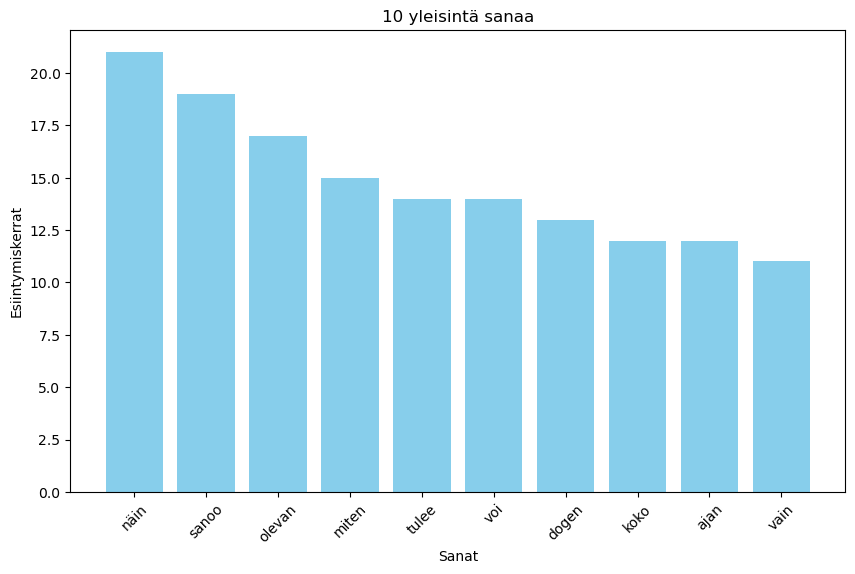

In [23]:
import matplotlib.pyplot as plt

# Valitaan visualisointiin 10 yleisintä sanaa
top_words = word_counts.most_common(10)

# Järjestetään sanat ja niiden esiintymiskerrat kahteen listaan
words, counts = zip(*top_words)

# Luodaan pylväsdiagrammi yleisimmistä sanoista
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Sanat')
plt.ylabel('Esiintymiskerrat')
plt.title('10 yleisintä sanaa')
plt.xticks(rotation=45)
plt.show()

### 6.7 LDA eli Dirichletin piilevä jako - näin teemat paljastuvat

In [24]:
# Latent Dirichlet Allocation (LDA) eli Dirichletin piilevä jako
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Tulostetaan ydinsanat aiheittain
print("LDAn eli piilevän Dirichletin jaon tuottamat aiheet:")
for topic_id, topic in lda_model.print_topics():
    topic_terms = topic.split(" + ")
    topic_terms_readable = [term.split("*")[1].strip().strip('"') for term in topic_terms]
    topic_terms_probabilities = [float(term.split("*")[0]) for term in topic_terms]

    print(f"\nAihe {topic_id +1}:")
    for term, prob in zip(topic_terms_readable, topic_terms_probabilities):
        print(f"   {term}: {100 * prob:.1f} %")


LDAn eli piilevän Dirichletin jaon tuottamat aiheet:

Aihe 1:
   dogen: 1.7 %
   koko: 1.5 %
   eri: 1.3 %
   ettei: 1.0 %
   pysty: 0.9 %
   mielen: 0.7 %
   samalla: 0.7 %
   nähdä: 0.7 %
   kuitenkin: 0.7 %
   voit: 0.7 %

Aihe 2:
   tulee: 1.6 %
   ymmärtää: 1.3 %
   miten: 1.3 %
   asian: 1.3 %
   vain: 1.2 %
   ihmisten: 0.8 %
   tiedä: 0.8 %
   kuten: 0.7 %
   jälkeen: 0.7 %
   sanoi: 0.7 %

Aihe 3:
   näin: 2.7 %
   voi: 1.7 %
   brad: 1.4 %
   ihmisiä: 1.3 %
   ehkä: 1.1 %
   asiat: 0.9 %
   kaikki: 0.9 %
   asioiden: 0.9 %
   sanoa: 0.8 %
   aikaan: 0.7 %

Aihe 4:
   ajan: 1.4 %
   kuulu: 1.2 %
   tavalla: 1.0 %
   tapa: 0.9 %
   rajoita: 0.8 %
   sama: 0.8 %
   hetki: 0.7 %
   vähän: 0.7 %
   jokainen: 0.7 %
   asia: 0.7 %

Aihe 5:
   sanoo: 2.7 %
   olevan: 2.3 %
   paljon: 1.3 %
   samaan: 1.1 %
   olemassa: 1.1 %
   aivan: 0.9 %
   tosi: 0.8 %
   ennen: 0.7 %
   jotain: 0.7 %
   toisin: 0.6 %


### 6.8 Sanapilvien luominen aihepiireittäin

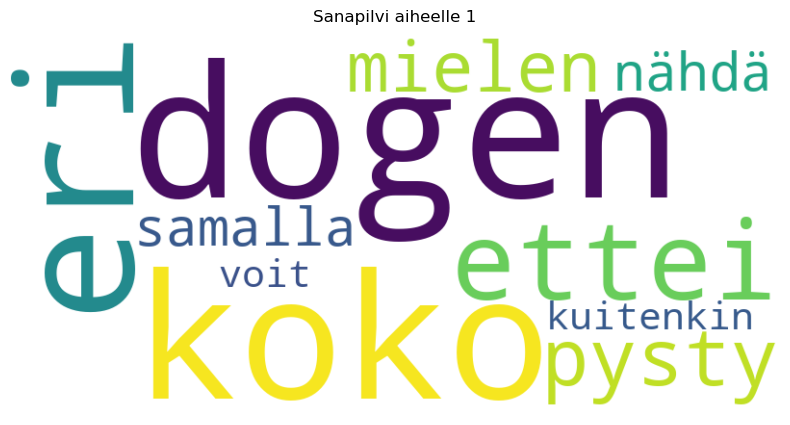

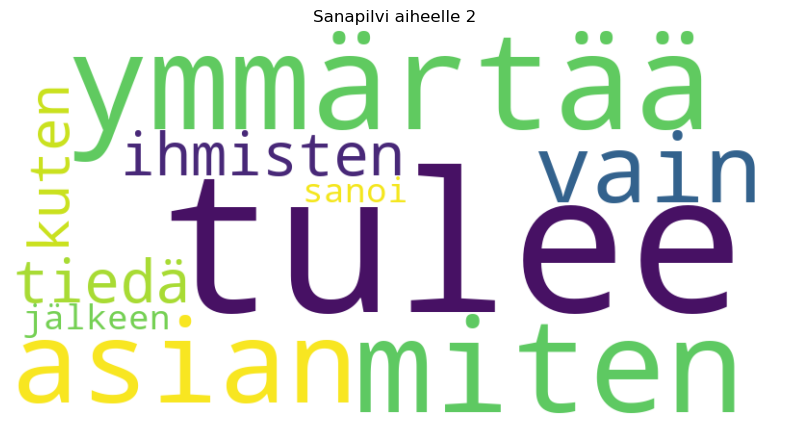

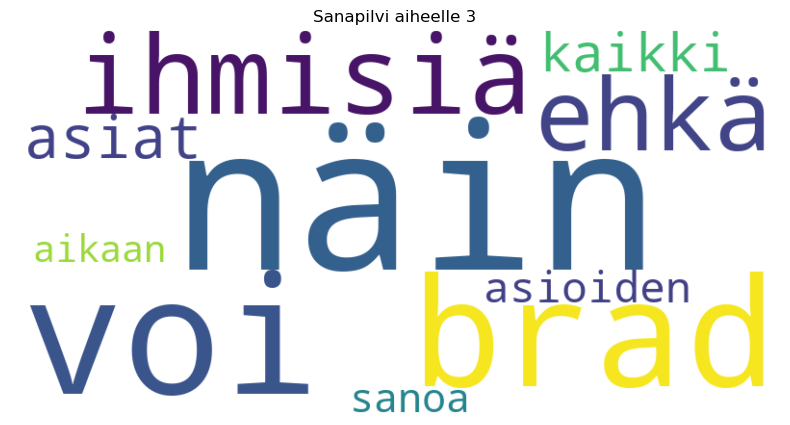

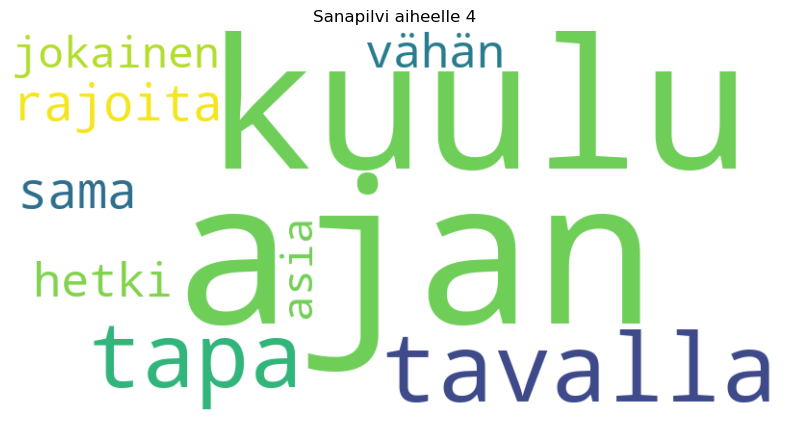

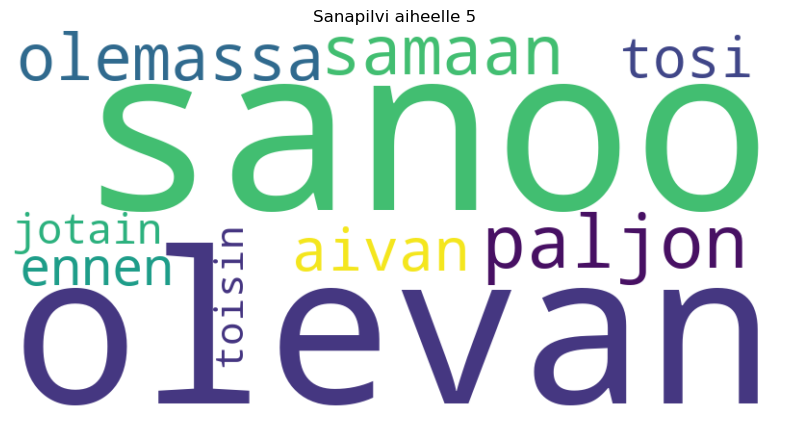

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to create word clouds for each topic
def create_wordcloud_for_topic(topic_id, topic_terms_readable, topic_terms_probabilities):
    wordcloud_data = {term: prob for term, prob in zip(topic_terms_readable, topic_terms_probabilities)}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Sanapilvi aiheelle {topic_id}")
    plt.axis('off')
    plt.show()

# Iterate through each topic and create a word cloud
for topic_id, topic in lda_model.print_topics():
    topic_terms = topic.split(" + ")
    topic_terms_readable = [term.split("*")[1].strip().strip('"') for term in topic_terms]
    topic_terms_probabilities = [float(term.split("*")[0]) for term in topic_terms]

    create_wordcloud_for_topic(topic_id + 1, topic_terms_readable, topic_terms_probabilities)


### 6.9 Further development ideas

- Tune Parameters: Experiment with different values for num_topics, passes, and other LDA parameters to optimize your topic model.
- Visualize Topics: Use visualization tools like pyLDAvis to interactively explore and visualize your LDA model results.
- Evaluate Model: Assess the quality of your topic model using metrics like coherence scores to determine the optimal number of topics.

In [26]:
# TODO: Some examples for the fi_core_news_sm about the missing topics

# This command will download the small Finnish language model (fi_core_news_sm) for spaCy.
# It includes vocabulary, syntax, entities, and word vectors trained on Finnish text.
# After running this command, you should be able to use the Finnish language model
# in your spaCy workflows by loading it with spacy.load('fi_core_news_sm').
# It can be used for tokenization, part-of-speech tagging, named entity recognition, and more.

"""
import spacy

# Define the model name
model_name = 'fi_core_news_sm'

# Check if the model is already installed
if model_name in spacy.util.get_installed_models():
    print(f"Model '{model_name}' is already installed.")
else:
    # Install the model if it's not already installed
    !python -m spacy download {model_name}
    print(f"Model '{model_name}' has been successfully installed.")

# Load the model regardless (it should be available after successful installation)
nlp = spacy.load(model_name)
"""
!clear

### 6.10 Yhteenveto

Aihepiirit erottuvat melko selkeästi LDAn avulla, ja vastaavat hyvin alkuperäisi blogitekstejä.

# 7 Sanapilven luominen LessWrong-kirjoituksista <a name="sanapilven-luominen-lesswrong-kirjoituksista"></a>

### 7.1 Johdanto esimerkkiin

Kerätään käytännön vinkkejä antavien kirjoitusten parhaimmistosta tusina, joista jalostetaan datatieteen menetelmin yleisimmin esiintyvät sanat. Näistä kasataan sanapilvi, jonka ideana on havainnollistaa hieman aihepiiriä ja sisältöä.

### 7.2 Kerätään teksti julkaisujen otsikoista ja leipätekstikappaleista BeautifulSoupin avulla

In [27]:
import os
import requests
from bs4 import BeautifulSoup
import time

import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# URLs of LessWrong posts to include
urls = [
    "https://www.lesswrong.com/posts/R6M4vmShiowDn56of/butterfly-ideas",
    "https://www.lesswrong.com/posts/ximou2kyQorm6MPjX/rest-days-vs-recovery-days",
    "https://www.lesswrong.com/posts/4EGYhyyJXSnE7xJ9H/in-my-culture",
    "https://www.lesswrong.com/posts/rz73eva3jv267Hy7B/can-you-keep-this-confidential-how-do-you-know",
    "https://www.lesswrong.com/posts/B2CfMNfay2P8f2yyc/the-loudest-alarm-is-probably-false",
    "https://www.lesswrong.com/posts/KwdcMts8P8hacqwrX/noticing-the-taste-of-lotus",
    "https://www.lesswrong.com/posts/ii4xtogen7AyYmN6B/learning-by-writing",
    "https://www.lesswrong.com/posts/4ZvJab25tDebB8FGE/you-get-about-five-words",
    "https://www.lesswrong.com/posts/4K5pJnKBGkqqTbyxx/to-listen-well-get-curious",
    "https://www.lesswrong.com/posts/MzKKi7niyEqkBPnyu/your-cheerful-price",
    "https://www.lesswrong.com/posts/R6M4vmShiowDn56of/butterfly-ideas",
    "https://www.lesswrong.com/posts/ximou2kyQorm6MPjX/rest-days-vs-recovery-days",
    "https://www.lesswrong.com/posts/vzfz4AS6wbooaTeQk/staring-into-the-abyss-as-a-core-life-skill",
    "https://www.lesswrong.com/posts/bx3gkHJehRCYZAF3r/pain-is-not-the-unit-of-effort"
]


def extract_text_from_url(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:124.0) Gecko/20100101 Firefox/124.0"
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the main content container by ID
        main_content_div = soup.find('div', id='postBody')

        if main_content_div:
            # Extract title
            title_element = main_content_div.find('h1', class_='PostsPage-secondSplashPageHeader')
            title = title_element.get_text() if title_element else "Title not found"

            # Extract link information
            link_element = soup.find('a', class_='LinkPostMessage-link')
            link = link_element['href'] if link_element else "Link not found"

            # Extract main content paragraphs
            paragraphs = main_content_div.find_all('p')
            main_text = '\n'.join([p.get_text() for p in paragraphs if p.get_text().strip()])

            # Prepare the formatted output
            formatted_text = f"{title}\n{link}\n\n{main_text}"
            return formatted_text
        else:
            return f"Main content div 'postBody' not found on the webpage {url}."
    else:
        return f"Failed to retrieve the webpage {url}. Status code: {response.status_code}"


# Check if LW_combined_text.txt exists and use it if available
if os.path.exists('LW_combined_text.txt'):
    with open('LW_combined_text.txt', 'r', encoding='utf-8') as file:
        LW_combined_text = file.read()
        print("Using existing LW_combined_text.txt as source.")
else:
    # Collect text from each URL
    texts = []
    for url in urls:
        extracted_text = extract_text_from_url(url)
        texts.append(extracted_text)

        # Respect the crawl delay specified in robots.txt (3 seconds)
        time.sleep(3)

    # Join all collected texts into one string
    LW_combined_text = '\n\n'.join(texts)

    # Save LW_combined_text to a file
    with open('LW_combined_text.txt', 'w', encoding='utf-8') as file:
        file.write(LW_combined_text)

    print("Combined text saved to 'LW_combined_text.txt'.")

Using existing LW_combined_text.txt as source.


### 7.3 Poistetaan yleisimmät täytesanat hyödyntämällä NLTK:ta ja luodaan sanapilvi wordcloudilla

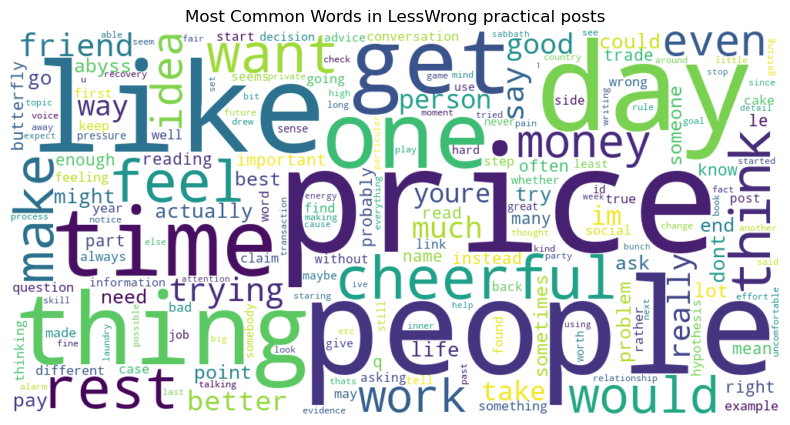

In [28]:
# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


# Function to preprocess text and count words
def count_and_visualize_words(text):
    # Remove punctuation
    text_no_punctuation = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize words
    words = word_tokenize(text_no_punctuation.lower())

    # Remove stopwords
    custom_stopwords = set(stopwords.words('english'))  # Using English stopwords for demonstration
    custom_stopwords.update(['also', '—', '“', '”', '’'])  # Add additional stopwords as needed

    filtered_words = [word for word in words if word not in custom_stopwords]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Count word occurrences
    word_counts = Counter(lemmatized_words)

    # Get the most common words and their counts
    common_words = word_counts.most_common(40)  # Get the top 40 most common words

    # Create a DataFrame for visualization
    df = pd.DataFrame(common_words, columns=['Word', 'Count'])

    # Generate word cloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_counts)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.title('Most Common Words in LessWrong practical posts')
    plt.show()

    return word_counts


# Count and visualize words in the LW_combined_text
word_counts = count_and_visualize_words(LW_combined_text)

"""
# Print word counts
print("Word counts:")
for word, count in word_counts.most_common(40):
    print(f"{word}: {count}")
"""
!clear

### 7.4 Kehitysideoita

Opas: Miten lukea sanapilveä?

Sanapilven voisi muotoilla esim. logon muotoiseksi luomalla kuvan pohjalta maskin, jota hyödyntää. 
https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214

https://gist.github.com/tiaplagata

Erilaisia valmiita värikokoelmia voisi käyttää.
https://matplotlib.org/tutorials/colors/colormaps.html

# 8 Datatiedeprojektin vaiheet <a name="datatiedeprojektin-vaiheet"></a>

### 8.1 Asiayhteyden ymmärtäminen

### 8.2 Aineiston kerääminen

### 8.3 Dataan tutustuminen

### 8.4 Esikäsittely

#### 8.4.1 Siivoaminen

#### 8.4.2 Suodattaminen

### 8.5 Jalostaminen

### 8.6 (Koneoppimis)menetelmien käyttäminen

#### 8.6.1 Opetus

#### 8.6.2 Testaus

#### 8.6.3 Laadunvarmistus

### 8.7 Havainnollistaminen

#### 8.7.1 Keskeiset piirteet

#### 8.7.2 Yleisölle räätälöinti

### 8.8 Hyödyntäminen

## Datatiedeprosesseista

https://learn.microsoft.com/en-us/azure/architecture/data-science-process/overview

https://www.houston-analytics.com/project-methodology

https://www.kdnuggets.com/polls/2014/analytics-data-mining-data-science-methodology.html

https://www.datascience-pm.com/crisp-dm-2/

## Datatieteilijän tärkeimmät taidot Sour Data:n mukaan
- tiedonhaku
- kriittinen ajattelu
- moninäkökulmaisuus
- lisäksi esim. itse valikoitu monipuolinen lähdelista (seurattavista ihmisistä ja muista), jonka tarkoituksena pysyä kärryillä alasta